In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
drinks = pd.read_csv('../workspace/python-data-analysis-master/data/drinks.csv')

In [4]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [5]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


## 수치적 정보를 파악(describe)

In [6]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [7]:
corr = drinks[["beer_servings", "wine_servings"]].corr(method='pearson')

In [8]:
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [9]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']

corr = drinks[cols].corr(method='pearson')

In [10]:
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


In [11]:
drinks["continent"].isnull().sum()

23

In [12]:
drinks['continent'] = drinks['continent'].fillna('OT')

In [13]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [14]:
# 대륙별 spirit_servings의 통계적 정보 확인하기

In [15]:
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])

In [16]:
means = result['mean'].tolist()

In [17]:
means

[16.339622641509433,
 60.84090909090909,
 132.55555555555554,
 58.4375,
 165.7391304347826,
 114.75]

In [18]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()

In [19]:
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()

In [20]:
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [21]:
continent_over_mean = continent_mean[continent_mean >= total_mean]

In [22]:
continent_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [23]:
africa = drinks.loc[drinks["continent"]== 'AF']
europe = drinks.loc[drinks["continent"]== 'EU']

In [24]:
from scipy import stats

In [25]:
tTest_result = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])

In [26]:
tTest_result

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)

In [27]:
# Levene 의 등분산 검정
Iresult = stats.levene(africa['beer_servings'], europe['beer_servings'])
print('LeveneResult(F) : %.3f \np-value :, %.3f' %(Iresult))

LeveneResult(F) : 6.015 
p-value :, 0.016


In [28]:
# 프로야구연봉 데이터셋의 기본정보 구하기

In [29]:
picher_file_path = '../workspace/python-data-analysis-master/data/picher_stats_2017.csv'

batter_file_path = '../workspace/python-data-analysis-master/data/batter_stats_2017.csv'

In [30]:
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [31]:
picher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [32]:
batter.columns

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

In [33]:
picher.shape

(152, 22)

In [34]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [35]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

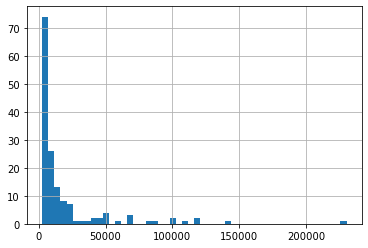

In [36]:
picher['연봉(2018)'].hist(bins=50)

C:\Users\leejh\Anaconda3\envs\static\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\leejh\Anaconda3\envs\static\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\leejh\Anaconda3\envs\static\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\leejh\Anaconda3\envs\static\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0, flags=flags)


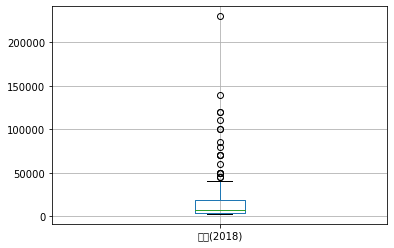

In [38]:
picher.boxplot(column='연봉(2018)')

In [56]:
## 회귀분석에 사용할 feature 살펴보기

In [ ]:
picher_features_df = picher['승']